In [39]:
import pandas as pd
import numpy as np
from common import collect_results, normalize_region_name
from pathlib import Path
from matplotlib import pyplot as plt
import os

In [40]:
def get_matcher(prefix):
    def matcher(p: Path):   
        import re
        pattern = re.compile(prefix + r"-hot(\d+)-(\w)-mr(\d+)-([\d-]+)")
        match = pattern.match(p.name)
        if not match:
            return None

        print("Found result:", p.name)
        hot = int(match.group(1))
        return {
            "hot": 1000000 if hot == 0 else hot,
            "workload": str(match.group(2)),
            "mr": int(match.group(3)),
            "suffix": str(match.group(4)),
        }
    
    return matcher

In [41]:
OUTPUT_DIR = Path("./output/")
ROOT = Path("./ycsb")
SYSTEMS = ["sunstorm", "aurora-global", "aurora-eventual", "yugabyte"]
HOTS = [100000, 1000]
RENEW_CACHE = False

sunstorm_matcher = get_matcher("ycsb-throughput-sunstorm")
sunstorm_throughput_df = collect_results(
    ROOT / "throughput-sunstorm",
    sunstorm_matcher,
    RENEW_CACHE,
)
sunstorm_throughput_df["system"] = "sunstorm"


aurora_matcher = get_matcher("ycsb-throughput-aurora")
aurora_throughput_df = collect_results(
    ROOT / "throughput-aurora",
    aurora_matcher,
    RENEW_CACHE,
)
# aurora_throughput_df["system"] = "aurora"
aurora_throughput_df["system"] = "aurora-global"

aurora_matcher = get_matcher("ycsb-throughput-aurora-eventual")
aurora_eventual_throughput_df = collect_results(
    ROOT / "throughput-aurora-eventual",
    aurora_matcher,
    RENEW_CACHE,
)
aurora_eventual_throughput_df["system"] = "aurora-eventual"


yugabyte_matcher = get_matcher("ycsb-throughput-yugabyte")
yugabyte_throughput_df = collect_results(
    ROOT / "throughput-yugabyte",
    yugabyte_matcher,
    RENEW_CACHE,
)
yugabyte_throughput_df["system"] = "yugabyte"

In [42]:
SYSTEMS = ["sunstorm", "aurora-global", "aurora-eventual", "yugabyte"]
ROOT = Path("./mixed")
HOTS = [100000, 1000]
RENEW_CACHE = False

sunstorm_matcher = get_matcher("ycsb-mixed-sunstorm")
mixed_sunstorm_throughput_df = collect_results(
    ROOT / "sunstorm",
    sunstorm_matcher,
    RENEW_CACHE,
)

mixed_sunstorm_throughput_df["system"] = "sunstorm"

aurora_matcher = get_matcher("ycsb-mixed-aurora")
mixed_aurora_throughput_df = collect_results(
    ROOT / "aurora",
    aurora_matcher,
    RENEW_CACHE,
)
mixed_aurora_throughput_df["system"] = "aurora-global"


aurora_matcher = get_matcher("ycsb-mixed-aurora")
mixed_aurora_eventual_throughput_df = collect_results(
    ROOT / "aurora-eventual",
    aurora_matcher,
    RENEW_CACHE,
)
mixed_aurora_eventual_throughput_df["system"] = "aurora-eventual"

yugabyte_matcher = get_matcher("ycsb-mixed-yugabyte")
mixed_yugabyte_throughput_df = collect_results(
    ROOT / "yugabyte",
    yugabyte_matcher,
    RENEW_CACHE,
)
mixed_yugabyte_throughput_df["system"] = "yugabyte"

In [43]:
ycsb_throughput_df = pd.concat([
    sunstorm_throughput_df,
    aurora_throughput_df,
    aurora_eventual_throughput_df,
    yugabyte_throughput_df,
])
ycsb_throughput_df["HOT"] = ycsb_throughput_df["hot"]
ycsb_throughput_df["workload"] = "RMW"
normalize_region_name(ycsb_throughput_df)
ycsb_throughput_df

,path,region,hot,workload,mr,suffix,rejected,rejected.WorkloadF1,rejected.WorkloadF2,rejected.WorkloadF3,...,p90.WorkloadF1,p95.WorkloadF1,p99.WorkloadF1,p100.WorkloadF1,throughput,unexpected.WorkloadF2,unexpected.WorkloadF3,system,unexpected.WorkloadF1,HOT
0,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,1-us-east-1-0,1000,RMW,50,20240430-163636,40903,2230,29215.0,9458.0,...,5.3930,7.55555,133.67350,388.599,963.188020,NaN,NaN,sunstorm,NaN,1000
1,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,3-ap-northeast-1-0,1000,RMW,50,20240430-163636,32562,1973,23506.0,7083.0,...,4.8010,7.33830,170.76156,453.628,603.742952,NaN,NaN,sunstorm,NaN,1000
2,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,2-eu-west-1-0,1000,RMW,50,20240430-163636,35186,2175,24721.0,8290.0,...,5.3130,7.70070,170.09104,393.213,790.151340,NaN,NaN,sunstorm,NaN,1000
3,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,1-us-east-1-0,10000,RMW,50,20240430-161215,3402,502,2246.0,654.0,...,5.1520,5.60200,8.51974,247.081,1726.062443,NaN,NaN,sunstorm,NaN,10000
4,ycsb/throughput-sunstorm/ycsb-throughput-sunst...,3-ap-northeast-1-0,10000,RMW,50,20240430-161215,3258,485,2143.0,630.0,...,4.4870,4.96975,7.44565,283.674,1172.259113,NaN,NaN,sunstorm,NaN,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,ycsb/throughput-yugabyte/ycsb-throughput-yugab...,3-ap-northeast-1-0,10000,RMW,0,20240501-110250,6989,6989,NaN,NaN,...,257.8406,283.08275,424.57221,723.915,2381.210394,NaN,NaN,yugabyte,NaN,10000
56,ycsb/throughput-yugabyte/ycsb-throughput-yugab...,2-eu-west-1-0,10000,RMW,0,20240501-110250,6998,6998,NaN,NaN,...,264.2103,282.00065,325.72003,721.902,2349.825579,NaN,NaN,yugabyte,NaN,10000
57,ycsb/throughput-yugabyte/ycsb-throughput-yugab...,1-us-east-1-0,10000,RMW,50,20240501-110250,7574,1032,5266.0,1276.0,...,56.7657,77.50420,456.56106,3768.032,1114.025362,NaN,NaN,yugabyte,NaN,10000
58,ycsb/throughput-yugabyte/ycsb-throughput-yugab...,3-ap-northeast-1-0,10000,RMW,50,20240501-110250,5196,675,3666.0,855.0,...,31.0510,217.65610,702.52806,3312.174,765.776569,NaN,NaN,yugabyte,NaN,10000


In [44]:
mixed_throughput_df = pd.concat([
    mixed_sunstorm_throughput_df,
    mixed_aurora_throughput_df,
    mixed_aurora_eventual_throughput_df,
    mixed_yugabyte_throughput_df,
])
mixed_throughput_df["HOT"] = mixed_throughput_df["hot"]
mixed_throughput_df["workload"] = "Read-Heavy"
normalize_region_name(mixed_throughput_df)
mixed_throughput_df

,path,region,hot,workload,mr,suffix,rejected,rejected.WorkloadB1,rejected.WorkloadB2,rejected.WorkloadB3,...,scalefactor,terminals,time,rate,warmup,system,unexpected.WorkloadB1,unexpected.WorkloadB2,unexpected.WorkloadB3,HOT
0,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,1-us-east-1-0,100000,Read-Heavy,50,20240604-111535,38,2.0,28.0,8.0,...,1000,128,90,50000,30,sunstorm,NaN,NaN,NaN,100000
1,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,3-ap-northeast-1-0,100000,Read-Heavy,50,20240604-111535,33,3.0,25.0,5.0,...,1000,128,90,50000,30,sunstorm,NaN,NaN,NaN,100000
2,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,2-eu-west-1-0,100000,Read-Heavy,50,20240604-111535,27,2.0,22.0,3.0,...,1000,128,90,50000,30,sunstorm,NaN,NaN,NaN,100000
3,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,1-us-east-1-0,100000,Read-Heavy,5,20240604-111535,86,18.0,53.0,15.0,...,1000,96,90,50000,30,sunstorm,NaN,NaN,NaN,100000
4,mixed/sunstorm/ycsb-mixed-sunstorm-hot100000-F...,3-ap-northeast-1-0,100000,Read-Heavy,5,20240604-111535,122,11.0,94.0,17.0,...,1000,96,90,50000,30,sunstorm,NaN,NaN,NaN,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,mixed/yugabyte/ycsb-mixed-yugabyte-hot1000-F-m...,3-ap-northeast-1-0,1000,Read-Heavy,15,20240604-171936,4906,1543.0,2774.0,589.0,...,1000,512,90,50000,30,yugabyte,NaN,NaN,NaN,1000
26,mixed/yugabyte/ycsb-mixed-yugabyte-hot1000-F-m...,2-eu-west-1-0,1000,Read-Heavy,15,20240604-171936,5846,2235.0,2962.0,649.0,...,1000,512,90,50000,30,yugabyte,NaN,NaN,NaN,1000
27,mixed/yugabyte/ycsb-mixed-yugabyte-hot1000-F-m...,1-us-east-1-0,1000,Read-Heavy,0,20240604-171936,6279,6279.0,NaN,NaN,...,1000,512,90,50000,30,yugabyte,NaN,NaN,NaN,1000
28,mixed/yugabyte/ycsb-mixed-yugabyte-hot1000-F-m...,3-ap-northeast-1-0,1000,Read-Heavy,0,20240604-171936,6760,6760.0,NaN,NaN,...,1000,512,90,50000,30,yugabyte,NaN,NaN,NaN,1000


In [45]:
throughput_df = pd.concat([ycsb_throughput_df, mixed_throughput_df])

In [46]:
error_columns = ['ood_index_page', 'ood_tuple', 'other_aborts'] 
error_df = throughput_df.groupby(["workload","hot", "system", "mr"]).sum()[error_columns + ['ood_table', 'deadlock', 'completed']]
error_df["outdated index page"] = error_df["ood_index_page"] / error_df["completed"] * 100
error_df["outdated table"] = error_df["ood_table"] / error_df["completed"] * 100
error_df["outdated tuple"] = error_df["ood_tuple"] / error_df["completed"] * 100
error_df["other aborts"] = error_df["other_aborts"] / error_df["completed"] * 100
error_df["deadlock"] = error_df["deadlock"] / error_df["completed"] * 100
error_df["pct"] = error_df["deadlock"] + error_df["outdated index page"] + error_df["outdated table"] + error_df["outdated tuple"] + error_df["other aborts"]
error_df.loc[("RMW", 1000, "sunstorm")]




,ood_index_page,ood_tuple,other_aborts,ood_table,deadlock,completed,outdated index page,outdated table,outdated tuple,other aborts,pct
mr,,,,,,,,,,,
0,0,0,45788,0,0.0,3065815,0.000000,0.0,0.000000,1.493502,1.493502
5,10076,30026,37368,0,0.0,1289886,0.781154,0.0,2.327803,2.897000,6.005957
10,20618,23311,27495,0,0.0,797407,2.585631,0.0,2.923350,3.448051,8.957032
15,19878,20862,23318,0,0.0,602765,3.297803,0.0,3.461050,3.868506,10.627359
50,80247,10243,18161,0,0.0,212138,37.827735,0.0,4.828461,8.560937,51.217132


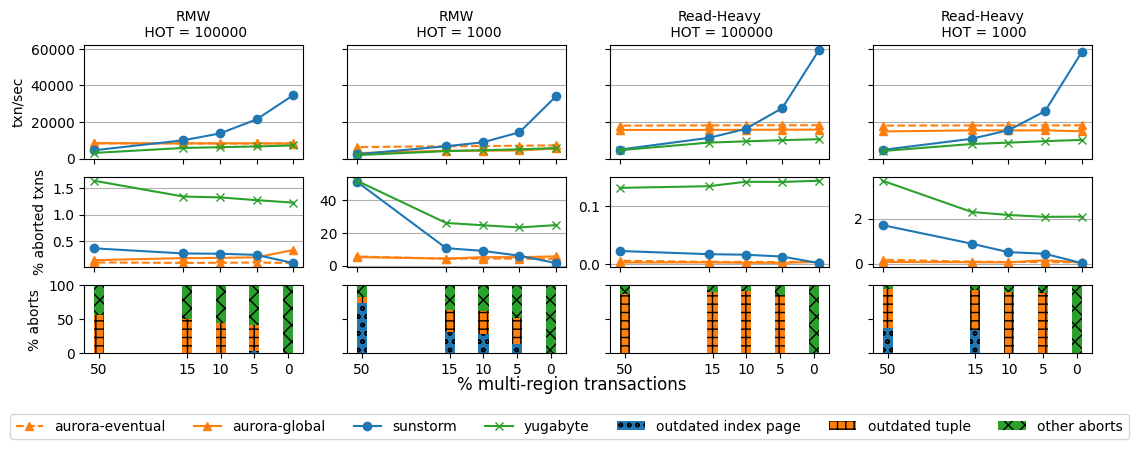

In [56]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D

plt.rc('axes', labelsize=10) 
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)  

xticks = [0, 5, 10, 15, 50]
xticklabels = [0, 5, 10, 15, 50]
legend_handles = []
legend_labels = []
abort_colors = ["C0", "C1", "C2"]
abort_patterns = ["oo", "++", "xx"]
error_columns = ['outdated index page', 'outdated tuple', 'other aborts'] 

workloads = ["RMW", "Read-Heavy"]



fig = plt.figure(figsize=(13, 4))
gs = GridSpec(3, 4, figure=fig, height_ratios=[2.5, 2, 1.5], width_ratios=[1, 1, 1, 1])

for w, workload in enumerate(workloads):
    for h,hot in enumerate([100000, 1000]):
        ax = plt.subplot(gs[0, (w*2 + h)])
        hot_throughput_df = throughput_df[(throughput_df.hot == hot) & (throughput_df.workload == workload)]
        hot_throughput_df.pivot_table(
            index=["mr"], columns=["system"], values="throughput", aggfunc="sum"
        ).plot(
            ax=ax,
            ylabel="txn/sec",
            style=["^--", "^-", "o-", "x-"],
            color=["C1", "C1", "C0", "C2"],
            ylim=(0, 62000),
            rot=0,
            legend=False,
        )
        ax.set_title(f"{workload}\n HOT = {hot}",fontsize=10)
        ax.set_xscale("symlog", linthresh=20)
        ax.set_xticks(xticks)
        ax.set_xticklabels([])
        ax.margins(x=0.05)
        ax.grid(axis="y")
        ax.invert_xaxis()
        ax.set_xlabel("")
        
        if w+h == 0:
            handles, labels = ax.get_legend_handles_labels()
            legend_handles += handles
            legend_labels += labels
        else:
            ax.set_yticklabels([])
            ax.set_ylabel("")
        

        ax = plt.subplot(gs[1, h+2*w])

        error_df.unstack(level=1)["pct"].loc[workload][hot].unstack(level=0)\
            .set_index(np.array(xticks))\
            .plot(
                ax=ax,
                ylabel="% aborted txns",
                style=["^--", "^-", "o-", "x-"],
                color=["C1", "C1", "C0", "C2"],
                rot=0,
                legend=False,
            )

        ax.set_xscale("symlog", linthresh=20)
        ax.set_xticks(xticks)
        ax.set_xticklabels([])
        ax.margins(x=0.05)
        ax.grid(axis="y")
        ax.invert_xaxis()
        ax.get_yaxis().set_major_formatter(ScalarFormatter())
        if w+h != 0:
            ax.set_ylabel("")

        xticks_hack = [0, 5, 10, 15, 28]
        ax = plt.subplot(gs[2, h+2*w])
        sunstorm_error_df = error_df.loc[(workload, hot, "sunstorm",)].copy()
        error_columns_pct = [f"{col}" for col in error_columns]
        bottom = None
        for col, color, pattern in zip(error_columns_pct, abort_colors, abort_patterns):
            error = sunstorm_error_df[col] / sunstorm_error_df["pct"] * 100
            ax.bar(
                xticks_hack,
                error,
                bottom=bottom,
                label=col,
                width=1.5,
                facecolor=color,
                hatch=pattern,
            )
            if bottom is None:
                bottom = error
            else:
                bottom += error
        ax.set_ylim(0, 100)
        ax.margins(x=0.05)
        ax.set_xticks(xticks_hack)
        ax.set_xticklabels(xticklabels)
        ax.set_ylabel("% aborts")
        ax.invert_xaxis()
        if w+h == 0:
            handles, labels = ax.get_legend_handles_labels()
            legend_handles += handles
            legend_labels += labels
        else:
            ax.set_ylabel("")
            ax.set_yticklabels([])

fig.supxlabel("% multi-region transactions")
plt.legend(legend_handles, legend_labels, ncol=7,
           bbox_to_anchor=(1.2,-0.79)) 

plt.savefig("combined-throughput.pdf", bbox_inches="tight")
